<a href="https://colab.research.google.com/github/summerolmstead/Spotify-Top-Songs-2023-Analysis/blob/main/Spotify_Top_Songs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Data Visualization , Assignment 2 | Dataset 3 (6 Attributes) TOP SPOTIFY 2023

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

# Importing Dataset

In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/top-spotify-songs-2023/versions/1


In [2]:
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Dataset files: ['spotify-2023.csv']


In [3]:
import pandas as pd

csv_file_path = os.path.join(path, 'spotify-2023.csv')
df = pd.read_csv(csv_file_path,encoding='ISO-8859-1') #must use this encoding bc default didnt work

print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [4]:
print(df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

# Data Preprocessing

In [22]:
#duplicate rows
print(df.duplicated().sum())

df.drop_duplicates(inplace=True) # getting rid of potential dupes even tho there is 0 haha

df.dropna(inplace=True) # dropping nans / missing

#check for categorical columns - will one hot encode if keep later
print(df.select_dtypes(include=['object']).columns)

0
Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
       'in_shazam_charts', 'key', 'mode'],
      dtype='object')


In [6]:
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [7]:
#select only the relevant columns
df_selected = df[['track_name', 'artist(s)_name', 'streams', 'energy_%', 'danceability_%', 'speechiness_%']]

#check the first few rows of the cleaned DataFrame
print(df_selected.head())

                            track_name    artist(s)_name    streams  energy_%  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook  141381703        83   
1                                 LALA       Myke Towers  133716286        74   
2                              vampire    Olivia Rodrigo  140003974        53   
3                         Cruel Summer      Taylor Swift  800840817        72   
4                       WHERE SHE GOES         Bad Bunny  303236322        80   

   danceability_%  speechiness_%  
0              80              4  
1              71              4  
2              51              6  
3              55             15  
4              65              6  


# Data Analysis

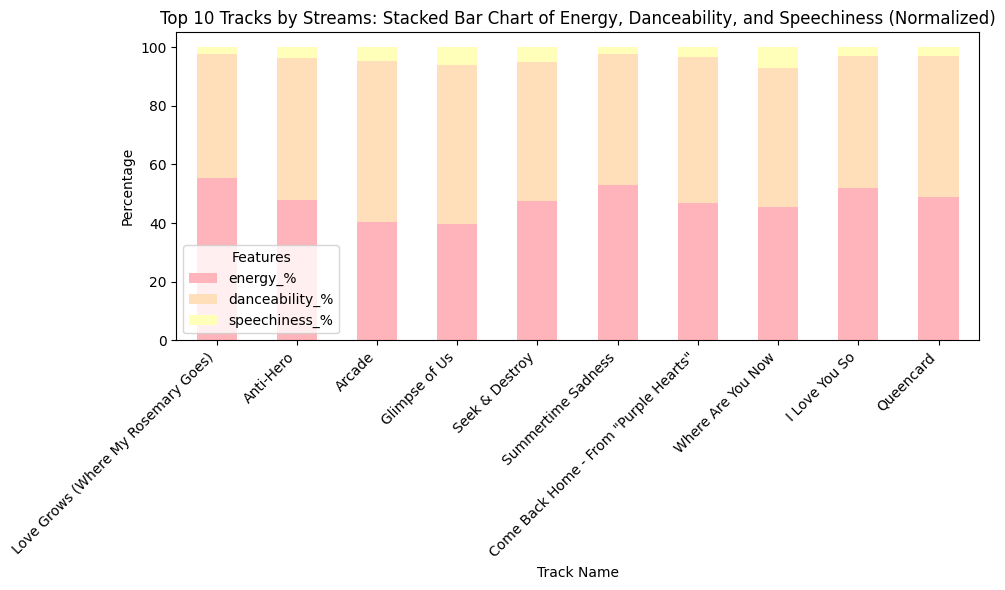

In [14]:
import matplotlib.pyplot as plt
# a list of colors for each feature
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA']  # soft pastel colors for energy, danceability, and speechiness
df_top10 = df.sort_values(by='streams', ascending=False).head(10) # getting top ten, removing some records just for easier visualization looked crazy with 923 on x axis lol

# normalize the data to make sure the sum of energy, danceability, and speechiness adds up to 100% for each track!
df_top10[['energy_%', 'danceability_%', 'speechiness_%']] = df_top10[['energy_%', 'danceability_%', 'speechiness_%']].div(df_top10[['energy_%', 'danceability_%', 'speechiness_%']].sum(axis=1), axis=0) * 100

# prepare the data for the stacked bar chart
df_stacked_top10 = df_top10[['track_name', 'energy_%', 'danceability_%', 'speechiness_%']].set_index('track_name')
# create the stacked bar chart
df_stacked_top10.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Top 10 Tracks by Streams: Stacked Bar Chart of Energy, Danceability, and Speechiness (Normalized)')
plt.xlabel('Track Name')
plt.ylabel('Percentage')
plt.legend(title='Features')
plt.xticks(rotation=45, ha='right')  # rotate track names for better readability!
plt.tight_layout()
plt.show()

In [11]:
print(df_top10[['energy_%', 'danceability_%', 'speechiness_%']].min())
print(df_top10[['energy_%', 'danceability_%', 'speechiness_%']].max())

energy_%          39.506173
danceability_%    42.400000
speechiness_%      2.400000
dtype: float64
energy_%          55.200000
danceability_%    54.878049
speechiness_%      7.092199
dtype: float64


This information tracks given the previous outcome of our stacked bar chart

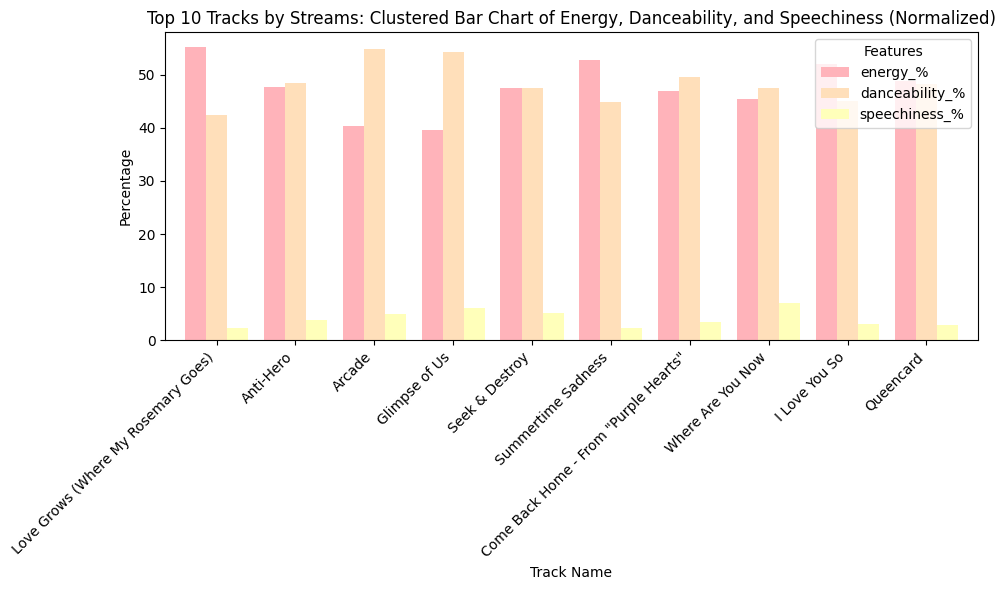

In [20]:
#colors for the bars in the clustered chart
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA']  # Soft pastel colors for energy, danceability, and speechiness

# prepare the data for the clustered bar chart
df_clustered_top10 = df_top10[['track_name', 'energy_%', 'danceability_%', 'speechiness_%']].set_index('track_name')

#the clustered bar chart
ax = df_clustered_top10.plot(kind='bar', figsize=(10, 6), color=colors, width=0.8)
plt.title('Top 10 Tracks by Streams: Clustered Bar Chart of Energy, Danceability, and Speechiness (Normalized)')
plt.xlabel('Track Name')
plt.ylabel('Percentage')
plt.legend(title='Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pair plot / scatterplot matrix

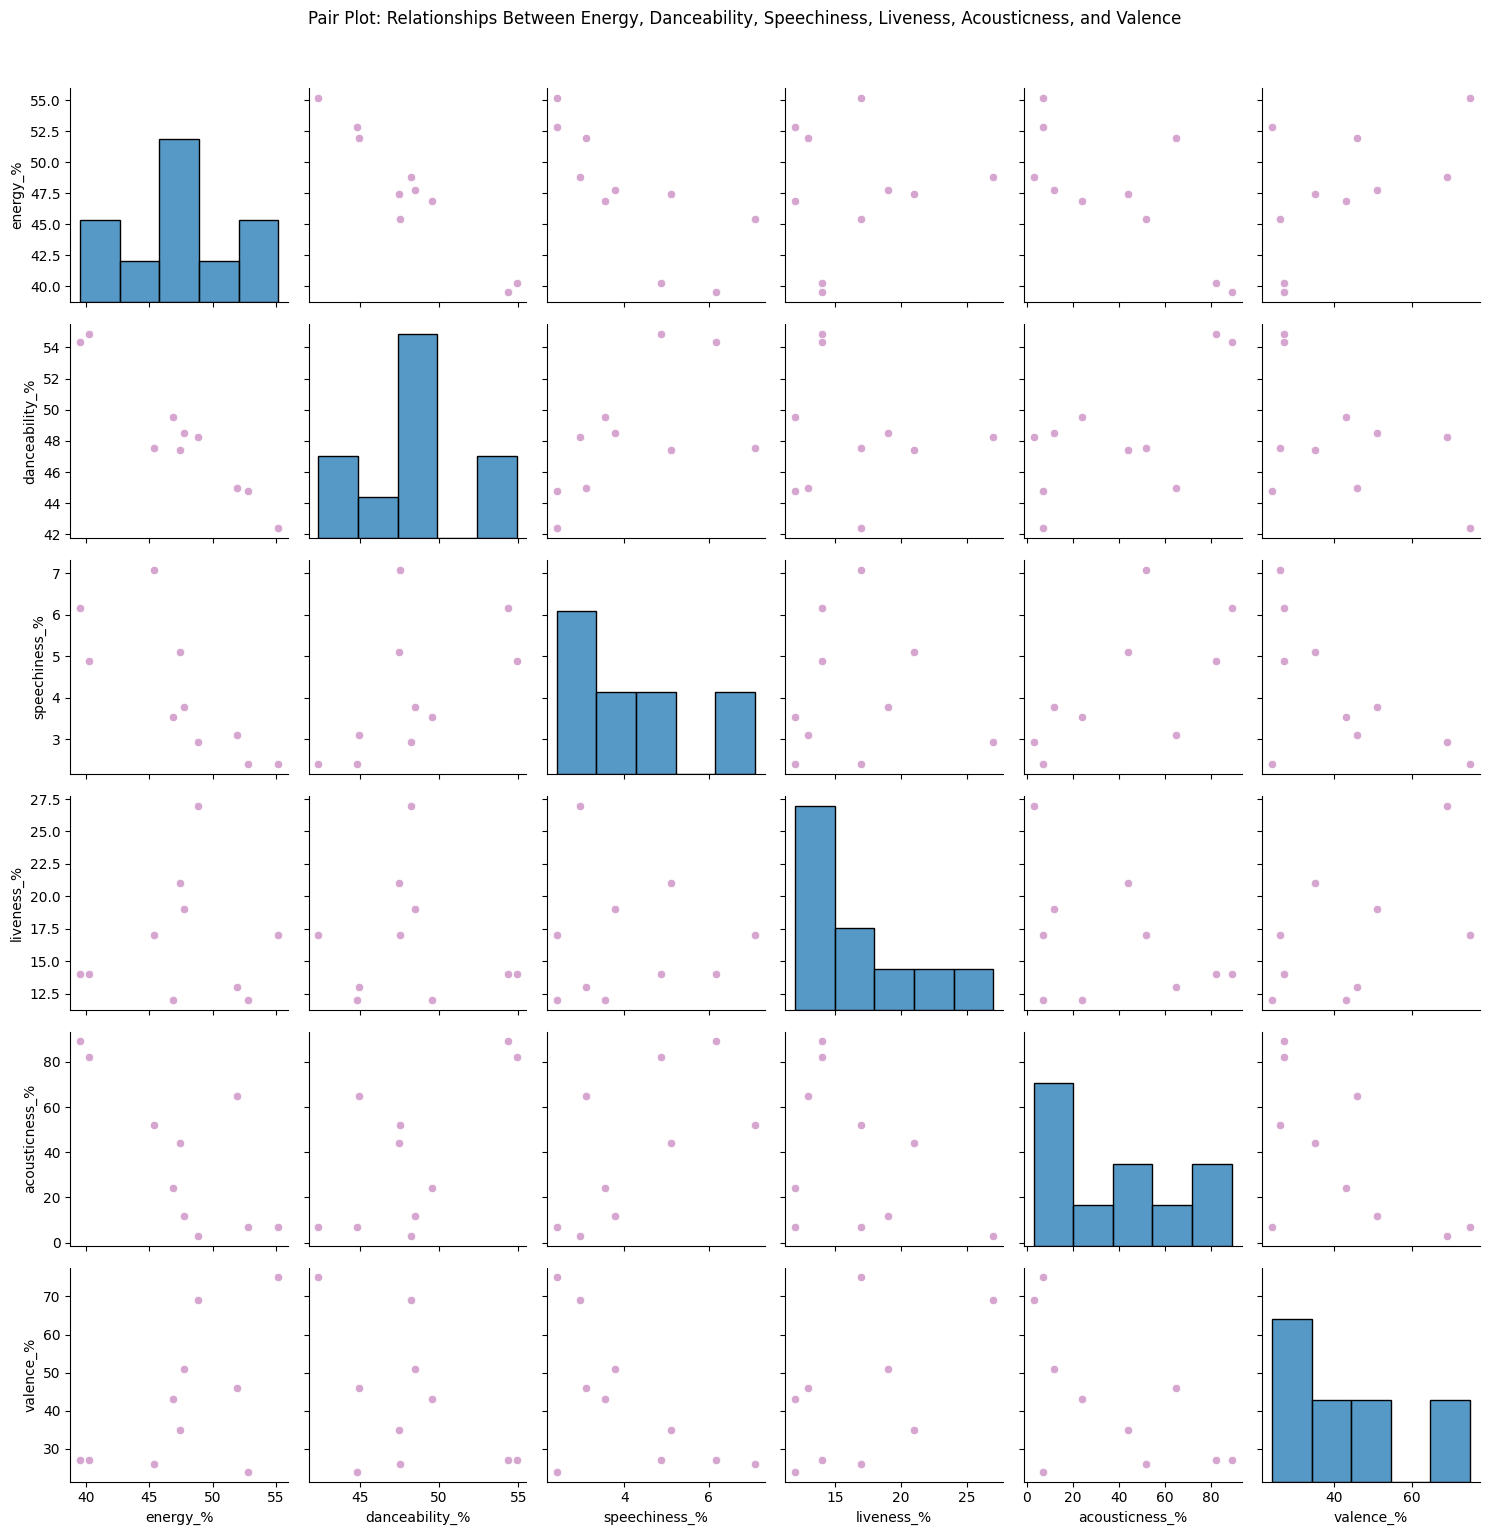

In [19]:
import seaborn as sns

#new dataframe that includes all six features of these different percentage types
df_pairplot_top10 = df_top10[['energy_%', 'danceability_%', 'speechiness_%', 'liveness_%', 'acousticness_%', 'valence_%']]

#the scatterplot matrix (pair plot) for the six features
sns.pairplot(df_pairplot_top10, kind='scatter', diag_kind='hist', plot_kws={'color': '#D6A6D1'})
plt.suptitle('Pair Plot: Relationships Between Energy, Danceability, Speechiness, Liveness, Acousticness, and Valence', y=1.02)
plt.tight_layout()
plt.show()